## Loading Data

In [43]:
df = read.csv('./data/carstopping.csv', sep='\t', fileEncoding='UTF-16LE')
head(df)

StopDist,Speed
4,4
2,5
8,5
8,5
4,5
6,7


## Scatter Plot of Data

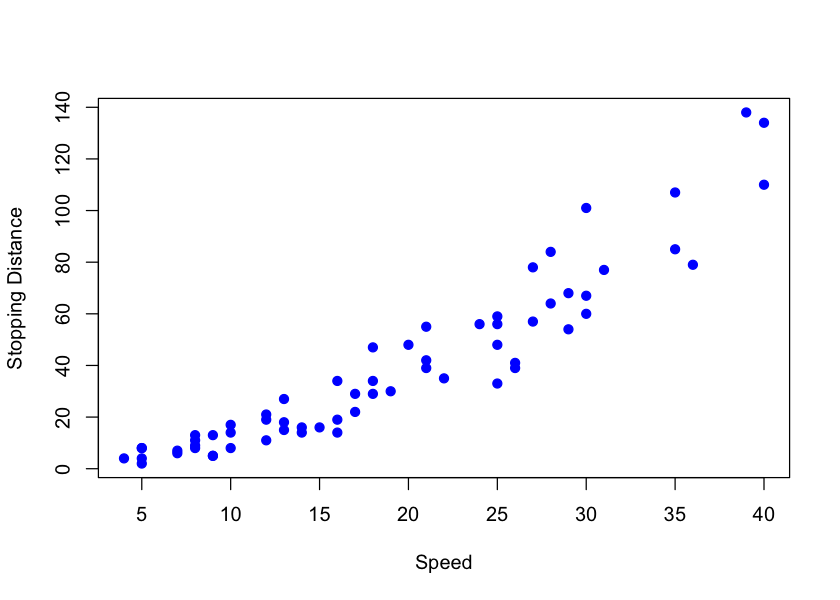

In [44]:
options(repr.plot.height=5)
plot(df$Speed, df$StopDist, col='blue', pch=19, xlab='Speed', ylab='Stopping Distance')

## Scatter Plot of Tranformed Data
Let's examine the scatterplot of $sqrt(StopDist)$ on $Speed$ and compare the overall pattern as well as the spread of the data to the previous plot.

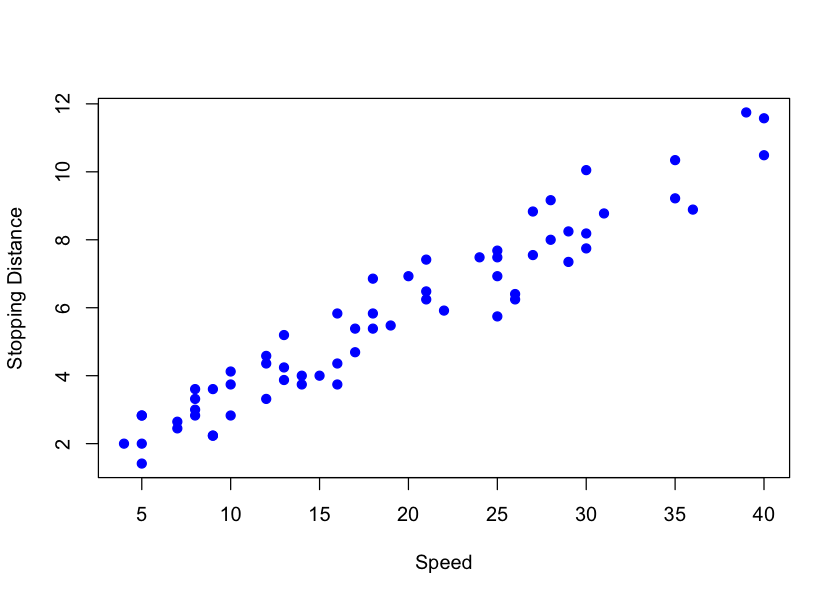

In [136]:
plot(df$Speed, sqrt(df$StopDist), col='blue', pch=19, xlab='Speed', ylab='Stopping Distance')

## Fitting Model on Original Data

In [100]:
model = lm(StopDist ~ Speed, data=df)
model.summ = summary(model)
model.summ


Call:
lm(formula = StopDist ~ Speed, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.141  -7.300  -2.141   6.044  35.946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.2734     3.2384   -6.26 4.25e-08 ***
Speed         3.1366     0.1517   20.68  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.8 on 61 degrees of freedom
Multiple R-squared:  0.8752,	Adjusted R-squared:  0.8731 
F-statistic: 427.7 on 1 and 61 DF,  p-value: < 2.2e-16


In [101]:
res = model.summ$residuals
t(res)

1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
11.72706,6.590466,12.59047,12.59047,8.590466,4.317285,5.317285,4.180695,3.180695,8.180695,...,-13.82429,27.17571,-6.824288,0.03912168,-4.507239,17.49276,-13.64383,35.9464,4.80981,28.80981


### Plot of the Regression Line

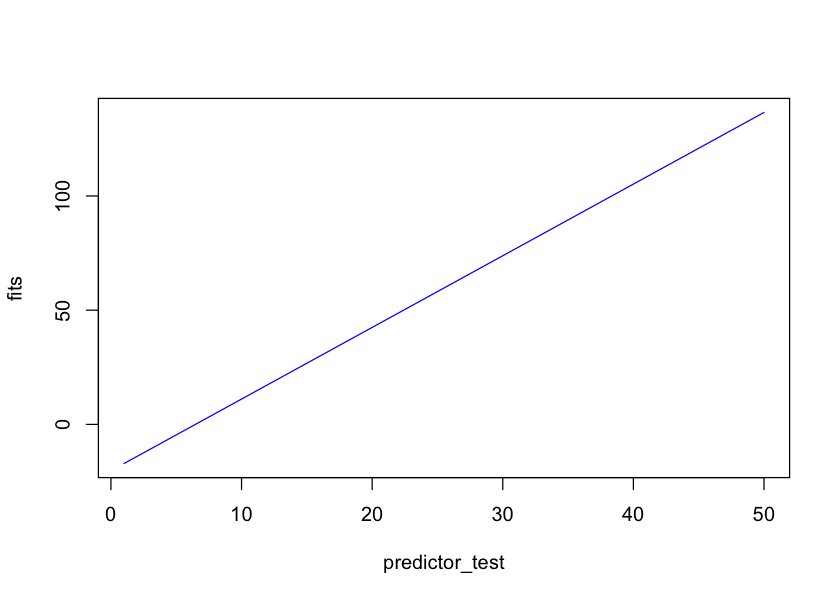

In [109]:
predictor_test = seq(1, 50, length=9)
fits = model.summ$coefficients[1] + predictor_test * model.summ$coefficients[2]
plot(predictor_test, fits, type='l', col='blue')

### Residuals vs. Predictor Plot

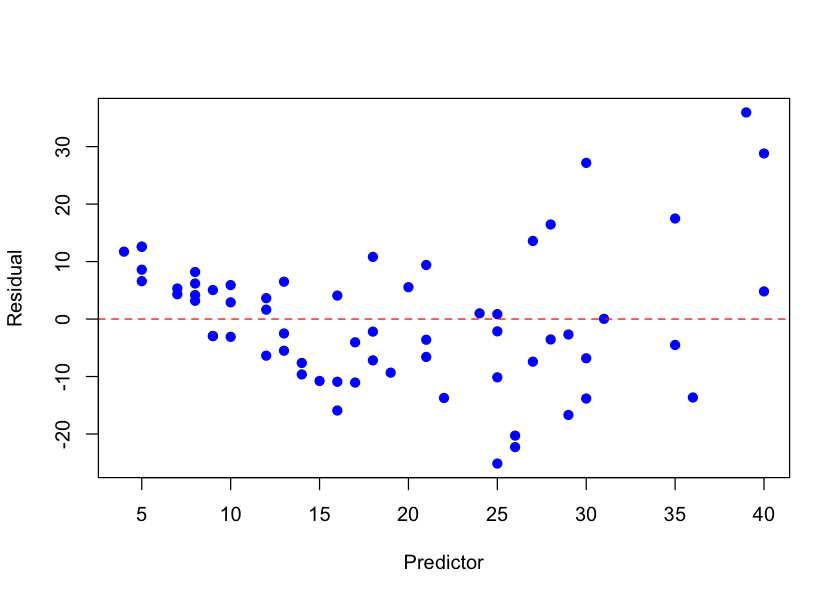

In [110]:
plot(df$Speed, res, col='blue', pch=19, xlab='Predictor', ylab='Residual')
abline(h=0, col='red', lty=2)

## Revising Model
Let's update the model representation by changing the regression formula into: $lm(\sqrt{y} \sim x)$.

In [48]:
model = lm(sqrt(StopDist) ~ Speed, data=df)
model.summ = summary(model)
model.summ


Call:
lm(formula = sqrt(StopDist) ~ Speed, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4879 -0.5487  0.0098  0.5291  1.5545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.918283   0.197406   4.652 1.82e-05 ***
Speed       0.252568   0.009246  27.317  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7193 on 61 degrees of freedom
Multiple R-squared:  0.9244,	Adjusted R-squared:  0.9232 
F-statistic: 746.2 on 1 and 61 DF,  p-value: < 2.2e-16


In [49]:
res = model.summ$residuals
t(res)

1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
0.07144341,-0.7669113,0.6473022,0.6473022,-0.1811249,-0.2367717,-0.04051015,0.06117024,-0.1104026,0.6667215,...,-0.7493655,1.554543,-0.3099794,0.02706395,-0.5386291,0.5859068,-1.122547,0.9788934,-0.5329266,0.5548218


### Plot of the Regression Curve

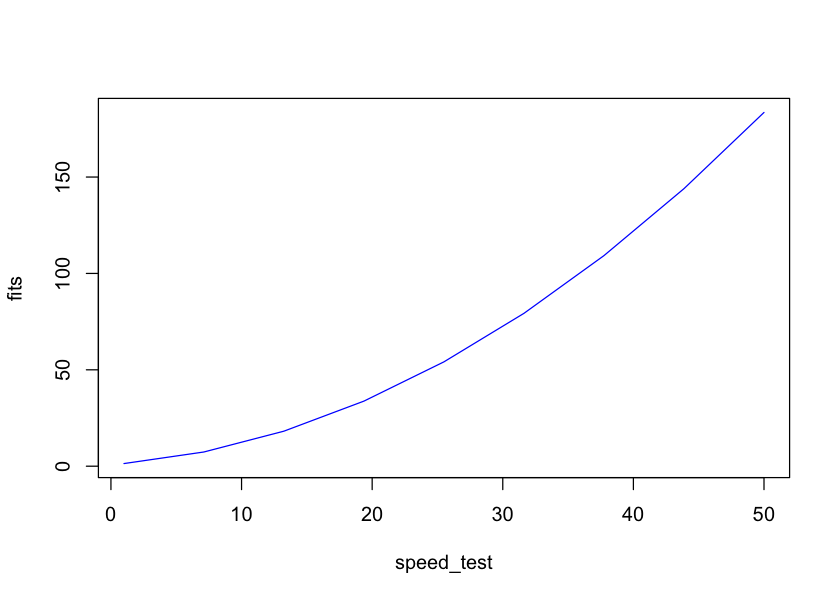

In [99]:
speed_test = seq(1, 50, length=9) # c(10, 20, 30, 40)
fits = (model.summ$coefficients[1] + speed_test * model.summ$coefficients[2])^2
plot(speed_test, fits, type='l', col='blue')

### Residuals vs. Predictor Plot

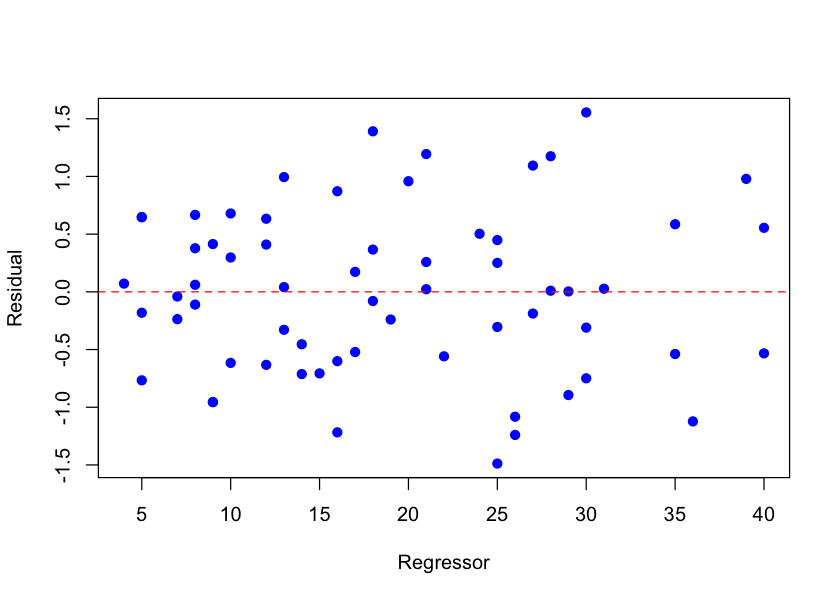

In [37]:
plot(df$Speed, res, col='blue', pch=19, xlab='Regressor', ylab='Residual')
abline(h=0, col='red', lty=2)

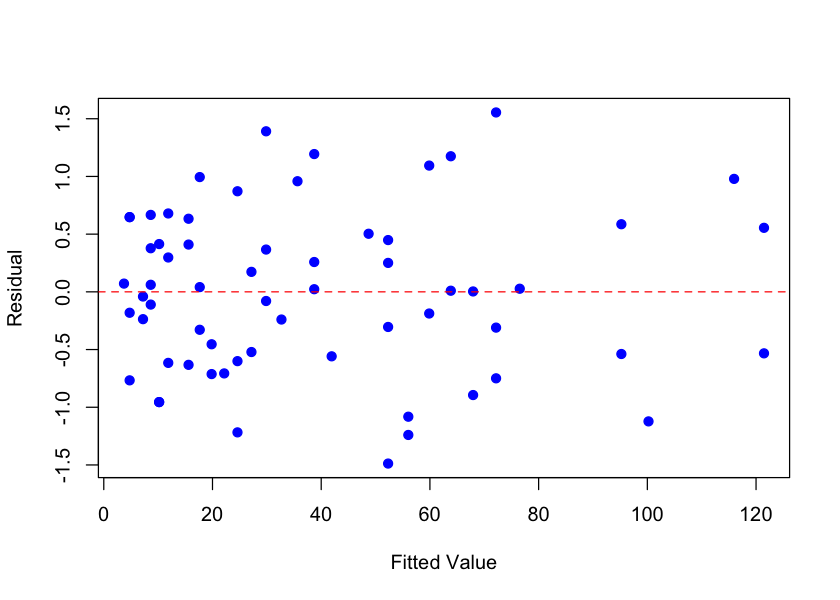

In [76]:
plot((model.summ$coefficients[1] + df$Speed * model.summ$coefficients[2])^2, res, col='blue', pch=19, xlab='Fitted Value', ylab='Residual')
abline(h=0, col='red', lty=2)